# **Metricas de modelos PREDICTIVOS DISCRETOS**

### Nombre: PFOCCORI QUISPE ALEX HARVEY

# **1. PASOS PREVIOS**

## Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modulo de separacion de datos
from sklearn.model_selection import train_test_split
# MOdulo de Matriz de confusion
from sklearn.metrics import confusion_matrix
# Modulo de Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Modulo de reporte de metricas
from sklearn.metrics import classification_report
# Metricas
from sklearn import metrics
# Curva ROC
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

## Carga de datos

In [3]:
# El objetivo del dataset, es identificacion de sexo en base a las medidas del resto
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
df = pd.read_csv('./voz.csv')
df.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frecuencia_media  3168 non-null   float64
 1   sd                3168 non-null   float64
 2   mediana           3168 non-null   float64
 3   Q1                3168 non-null   float64
 4   Q3                3168 non-null   float64
 5   IQR               3168 non-null   float64
 6   skew              3168 non-null   float64
 7   kurt              3168 non-null   float64
 8   sp.ent            3168 non-null   float64
 9   sfm               3168 non-null   float64
 10  moda              3168 non-null   float64
 11  centroide         3168 non-null   float64
 12  meanfun           3168 non-null   float64
 13  minfun            3168 non-null   float64
 14  maxfun            3168 non-null   float64
 15  meandom           3168 non-null   float64
 16  mindom            3168 non-null   float64


# **2. CONVERSION DE DATOS A DATOS CATEGORICOS**

### Implementacion de un modulo que convierte un atributo categorico a numerico utilizando las funciones **astype('category')** y **cat.codes**

In [8]:
def Categorico_a_numerico(atributo):
    # Convertir el atributo al tipo categorico
    atributo = atributo.astype('category')
    # Convertir el atributo categorico a numerico
    return atributo.astype('category').cat.codes

In [9]:
# Convertir los datos categoricos a numerico
df['genero'] = Categorico_a_numerico(df['genero'])


In [13]:
# Datos despues de la correcion
df.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# **3. APLICACION DEL MODELO PREDICTIVO**

## Separacion de datos para entrenamiento y test

In [14]:
x = df.drop(['genero'], axis = 1)
y = df['genero']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

## Entrenamiento con arbo de decision

In [15]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelo.fit(x_train, y_train)
modelo.score(x_test, y_test)

0.9700315457413249

# **4. PREDICCION DEL MODELO**

## Prediccion de datos de test

In [16]:
pred = modelo.predict(x_test)

## Resultados de la prediccion

In [17]:
pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

## Resultados de los datos reales

In [18]:
y_test

2823    0
1852    0
636     1
1153    1
72      1
       ..
2869    0
1049    1
908     1
494     1
1143    1
Name: genero, Length: 634, dtype: int8

# **5. CALCULO Y VISUALIZACION DE MATRICAS**

## Obtencion de metricas

In [19]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
Presicion = metrics.precision_score(y_test, pred)
Sensibilidad = metrics.recall_score(y_test, pred)
PuntuacionF1 = metrics.f1_score(y_test, pred)
Reporte = classification_report(y_test, pred)

## Matriz de confusion

In [20]:
print('Matriz de confusion')
print(MatrizConfusion)

Matriz de confusion
[[327   9]
 [ 10 288]]


In [21]:
print('Exactitud     : ', Exactitud)
print('Presicion     : ', Presicion)
print('Sensibilidad  : ', Sensibilidad)
print('Puntuacion F1 : ', PuntuacionF1)

Exactitud     :  0.9700315457413249
Presicion     :  0.9696969696969697
Sensibilidad  :  0.9664429530201343
Puntuacion F1 :  0.9680672268907563


In [22]:
print('Reporte de metricas: ')
print(Reporte)

Reporte de metricas: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       336
           1       0.97      0.97      0.97       298

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## Curva ROC

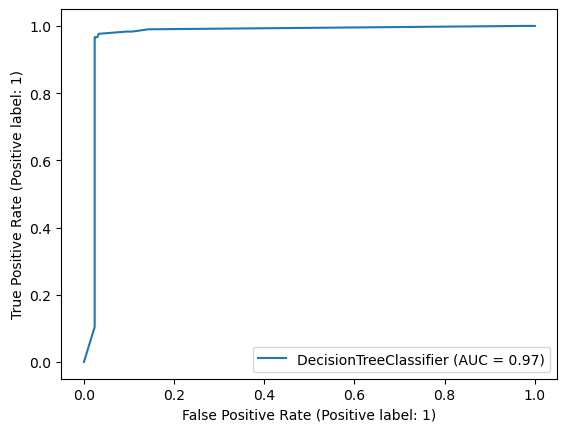

In [23]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)